# Sok-1006 Mikro
## Seminar 8
### Oppgave 2

Vi skal gjenbruke koden fra Seminar 7 oppgave 2 for å regne ut etterspørsel.

### deloppgave b

In [126]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [127]:
# Sett opp Lagrange for nyttemaksimering
sp.symbols("\lambda", real=True, positive=True)
x_1, x_2, m, p_1, p_2, lmda, gma_1, gma_2, b_1, b_2 =sp.symbols("x_1 x_2 m p_1 p_2 \lambda \gamma_1 \gamma_2 b_1 b_2", real=True, positive=True)
U=b_1*sp.log(x_1-gma_1)+b_2*sp.log(x_2-gma_2)
L=U-lmda*(p_1*x_1+p_2*x_2-m)
L

-\lambda*(-m + p_1*x_1 + p_2*x_2) + b_1*log(-\gamma_1 + x_1) + b_2*log(-\gamma_2 + x_2)

In [128]:
# Førsteordensbetingelser
dL_x_1=sp.diff(L,x_1)
dL_x_2=sp.diff(L,x_2)
display(dL_x_1)
display(dL_x_2)

-\lambda*p_1 + b_1/(-\gamma_1 + x_1)

-\lambda*p_2 + b_2/(-\gamma_2 + x_2)

In [129]:
display(dL_x_1.args)
display(dL_x_2.args)

(b_1/(-\gamma_1 + x_1), -\lambda*p_1)

(b_2/(-\gamma_2 + x_2), -\lambda*p_2)

In [130]:
display(dL_x_1.args[0]/dL_x_2.args[0])
display(dL_x_1.args[1]/dL_x_2.args[1])

b_1*(-\gamma_2 + x_2)/(b_2*(-\gamma_1 + x_1))

p_1/p_2

Da har vi $\frac{p_1}{p_2}=\frac{b_1(x_2-\gamma_2)}{b_2(x_1-\gamma_1)}$. Finn uttrykket for $x_1$:

In [131]:
x_1_rel=sp.solve(dL_x_1.args[0]/dL_x_2.args[0]-dL_x_1.args[1]/dL_x_2.args[1],x_1)[0]
x_2_rel=sp.solve(dL_x_1.args[0]/dL_x_2.args[0]-dL_x_1.args[1]/dL_x_2.args[1],x_2)[0]
display(x_1_rel)
display(x_2_rel)

(\gamma_1*b_2*p_1 - \gamma_2*b_1*p_2 + b_1*p_2*x_2)/(b_2*p_1)

(-\gamma_1*b_2*p_1 + \gamma_2*b_1*p_2 + b_2*p_1*x_1)/(b_1*p_2)

Da har vi $x_1, x_2$ som vi bruker i budsjettbetingelsen.

In [132]:
x_1_sol=sp.solve(sp.Eq((p_1*x_1+p_2*x_2).subs(x_2,x_2_rel),m),x_1)[0]
x_2_sol=sp.solve(sp.Eq((p_1*x_1+p_2*x_2).subs(x_1,x_1_rel),m),x_2)[0]
display(x_1_sol)
display(x_2_sol)

(\gamma_1*b_2*p_1 - \gamma_2*b_1*p_2 + b_1*m)/(p_1*(b_1 + b_2))

(-\gamma_1*b_2*p_1 + \gamma_2*b_1*p_2 + b_2*m)/(p_2*(b_1 + b_2))

In [133]:
# Bruk b_1+b_2=1
x_1_dem=x_1_sol.subs(b_2,(1-b_1))
x_1_dem

(\gamma_1*p_1*(1 - b_1) - \gamma_2*b_1*p_2 + b_1*m)/p_1

Dette er etterspørsel etter gode 1.       

La oss regne egenpris-, krysspris- og inntektselastisitetene:

In [134]:
egen_1=sp.diff(x_1_dem,p_1)*p_1/x_1_dem
sp.simplify(egen_1)

b_1*(-\gamma_2*p_2 + m)/(\gamma_1*p_1*(b_1 - 1) + \gamma_2*b_1*p_2 - b_1*m)

Dette er egenpriselastisiteten. Jussila et al skriver dette som $\frac{\gamma_1(1-b_1)}{x_1}-1$. La oss sjekke at dette er det samme som det vi har funnet:

In [135]:
sp.simplify(egen_1-((gma_1*(1-b_1)/x_1_dem)-1))

0

Så dette er det samme! Legg merke til at egenpriselastisiteten er avhengig av alle parametre i problemet, og kan da brukes til å forklare flere estimat av egenpriselastisitet.     

Vi ser nå på krysspriselastisitet:

In [136]:
kryss_1_2=sp.diff(x_1_dem,p_2)*p_2/x_1_dem
sp.simplify(kryss_1_2)

\gamma_2*b_1*p_2/(\gamma_1*p_1*(b_1 - 1) + \gamma_2*b_1*p_2 - b_1*m)

Jussila et al skriver dette som $-\frac{b_1\gamma_2p_2}{p_1x_1}$. Vi ser at telleren er det samme, og nevneren er

In [137]:
-p_1*x_1_dem

-\gamma_1*p_1*(1 - b_1) + \gamma_2*b_1*p_2 - b_1*m

som er det samme som ovenfor. Da har vi samme uttrykk som Jussila et al.    

Vi beregner inntektselastisiteten:

In [138]:
innt_1=sp.diff(x_1_dem,m)*m/x_1_dem
sp.simplify(innt_1)

-b_1*m/(\gamma_1*p_1*(b_1 - 1) + \gamma_2*b_1*p_2 - b_1*m)

Jussila et al (likning 8) skriver dette som $\frac{b_1m}{p_1x_1}$, og det er lett å sjekke at vi har det samme.

In [139]:
innt_1==(b_1*m)/(p_1*x_1_dem)

True

Se på formen på inntektselastisiteten. $\frac{p_1x_1}{m}=w_1$ er andelen av inntekten som brukes på gode 1. Da kan inntektselastisiteten skrives som $\frac{b_1}{w_1}$, og desto sterkere preferanse jeg har for gode 1 (målt ved $b_1$), jo høyere er inntektselastisitet. Desto større andel av inntekt jeg bruker på gode 1, jo mindre blir inntektselastisiteten.

### deloppgave b)     

Vi kan i hvert fall konstantere at elastisitetsutrykkene ikke er konstante tall slik som tilfellet var med Cobb-Douglas. De avhenger av modellens parametre. Det er ingenting i veien med å anta at $\gamma$ er negative tall (men da kan ikke tolkningen som minimumskonsum brukes).     

Krysspriselastisiteten 12 kan skrives som $-\frac{b_1\gamma_2p_2}{p_1x_1}$, og med $\gamma_2>0$ er dette negativt som vil si at gode 1 og 2 er komplementære. Prisen på gode 2 øker, og etterspørsel etter gode 1 faller. Dersom $\gamma_2<0$ er krysspriselastisiteten positiv, og da er godene substitutter. En økning i prisen på gode 2 fører til en økning i etterspørsel etter gode 1.

### deloppgave c)       

I seminarsett 7, oppgave 2 fant vi et uttrykk for utgiften på gode 1 som $p_1x_1=p_1\gamma_1+b_1(m-p_1\gamma_1-p_2\gamma_2)$. Utgiften på gode 1 består av to ledd: $p_1\gamma_1$ er det som konsumenten må bruke på gode 1 for å komme til minimumsnivået; $b_1(m-p_1\gamma_1-p_2\gamma_2)$ sier at konsumenten bruker en andel $b_1$ av inntekten som er igjen etter minimumskonsumet er unnagjort.    
Likeså kan man utlede utgiften på gode 2 som $p_2x_2=p_2\gamma_2+b_2(m-p_1\gamma_1-p_2\gamma_2)$ slik at man har en utgift til minimum konsum pluss en andel $b_2$ av "overskuddsinntekten" brukt på gode 2.      

Andelen av overskuddsinntekten som brukes på alle goder må summere til 1, og derfor er $b_1+b_2=1$?

### deloppgave d)     

Engelkurven viser forholdet mellom inntekt og etterspurt mengde.

In [140]:
x_1_fn=sp.lambdify( (gma_1,gma_2,b_1,p_1,p_2,m), x_1_dem)
display(x_1_fn(gma_1,gma_2,b_1,p_1,p_2,m))

(\gamma_1*p_1*(1 - b_1) - \gamma_2*b_1*p_2 + b_1*m)/p_1

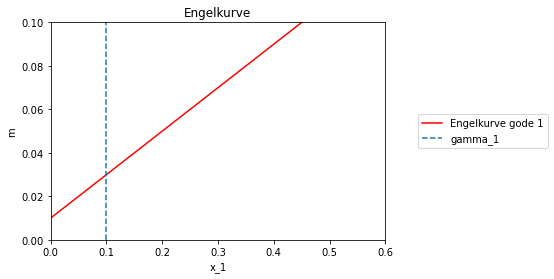

In [141]:
m_num=np.linspace(0.01,5,100)

# eksempel med b_1=.5, p_1=1, p_2=2, g_1=.1, g_2=.1

fig,ax=plt.subplots()
 
ax.set_ylabel('m')
ax.set_xlabel('x_1')
ax.plot(x_1_fn(.1,.1,.5,.1,.2,m_num), m_num, label='Engelkurve gode 1', color='red')
ax.vlines(.1,0,.1, ls='dashed', label='gamma_1')

             
    
ax.set_ylim([0, .1])
ax.set_xlim([0, .6])



ax.legend(bbox_to_anchor=(1.5,0.6))
ax.set_title('Engelkurve')


plt.show()

Legg merke til at det er tegnet inn en striplete linje som viser $\gamma_1$. Dette er fordi vi må ha at $x_1>\gamma_1$.    
Se på effekten av en økning i alle variablene med $\gamma_1$ konstant i første ommgang.

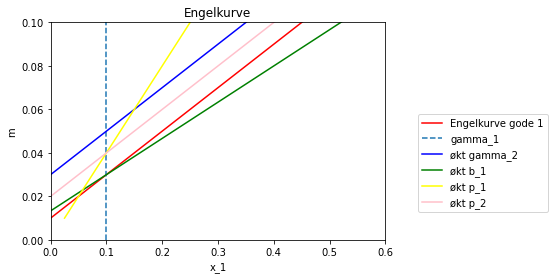

In [142]:
# x_1_fn(gma_1,gma_2,b_1,p_1,p_2,m)
# vi plusser 0.1 på hver variabel i tur og orden

ax.plot(x_1_fn(.1,.2,.5,.1,.2,m_num), m_num, label='økt gamma_2', color='blue')
ax.plot(x_1_fn(.1,.1,.6,.1,.2,m_num), m_num, label='økt b_1', color='green')
ax.plot(x_1_fn(.1,.1,.5,.2,.2,m_num), m_num, label='økt p_1', color='yellow')
ax.plot(x_1_fn(.1,.1,.5,.1,.3,m_num), m_num, label='økt p_2', color='pink')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

- økning i $\gamma_2$: for hvert inntektsnivå etterspørres mindre av gode 1. Minimumskonsum av 2 har gått opp, og en reduksjon i etterspørsel etter gode 1 følger.     
- økning i $b_1$: for hvert inntektsnivå etterspørres mer av gode 1. Konsumenten har en forsterket preferanse for gode 1, og en økning i etterspørsel etter gode 1 følger.      
- økning i $p_1$: for hvert inntekstnivå etterspørres mindre av gode 1. Gode 1 er blitt relativt dyrere. Legg merke til at helningen til Engelkurven endres (blir brattere). En ekstra 1kr i inntekt fører til en økning i etterspørsel etter gode 1, men mindre enn før prisøkningen.
- økning i $p_2$: for hvert inntekstnivå etterspørres mindre av gode 1. Det koster mer å få til minimumskonsumet, og da reduseres etterspørsel etter gode 1.

Vi ser nå i en annen figur på en økning i $\gamma_1$.

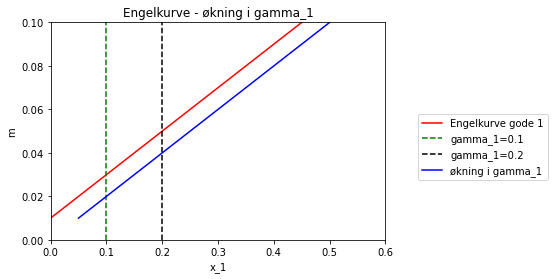

In [143]:
fig,ax1=plt.subplots()
 
ax1.set_ylabel('m')
ax1.set_xlabel('x_1')
ax1.plot(x_1_fn(.1,.1,.5,.1,.2,m_num), m_num, label='Engelkurve gode 1', color='red')
ax1.vlines(.1,0,.1, ls='dashed', label='gamma_1=0.1', color='green')

ax1.vlines(.2,0,.1, ls='dashed', label='gamma_1=0.2', color='black')

ax1.plot(x_1_fn(.2,.1,.5,.1,.2,m_num), m_num, label='økning i gamma_1', color='blue')

             
    
ax1.set_ylim([0, .1])
ax1.set_xlim([0, .6])



ax1.legend(bbox_to_anchor=(1.5,0.6))
ax1.set_title('Engelkurve - økning i gamma_1')


plt.show()

økning i $\gamma_1$: for hvert inntektsnivå etterspørres mer av gode 1. Minimumskonsum av 1 har gått opp, og en økning i etterspørsel etter gode 1 følger. 